# Pathfinding algorithms

Andrea Zarahi Rubio Quezada | A01645257

The notebook aims to study and apply four pathfinding algorithms for searching the (shorthest) path in an (un)directed graph) from a starting vertex to a goal vertex.

The notebook consits of two parts
- Part 1: Using graphs
- Part 2: Using 2D maps






**1) Basic greedy rule search**

- This algorithm builds a path by repeatedly adding the edge with the minimum weight, as long as it connects to the current path without forming a cycle.

- The goal is to construct a path with minimal cost by choosing locally optimal edges step-by-step, ultimately approaching an efficient solution.


**2) Dijkstra search**

- This algorithm finds the shortest path from a starting vertex to all other vertices in a weighted graph with non-negative edge weights.

- At each step, it selects the unvisited vertex with the smallest known distance from the start (among vertices that can extend an existing shortest path by one edge) and updates the shortest paths to its neighboring vertices.


**3) Greedy best first search**

- This algorithm that expands the path from the current vertex by selecting the next vertex estimated to be closest to the goal, according to a heuristic function $h(n)$.

- At each step, it chooses the vertex with the lowest heuristic value $h(n)$, which estimates the remaining distance from that vertex to the goal.


**4) Astar search**

- This algorithm finds the shortest path to a goal by evaluating nodes based on two values: the cost from the start to the current node $g(n)$, and the estimated cost from the current node to the goal $h(n)$.

- The algorithm combines these to prioritize nodes with the lowest total estimated cost  $f(n)=g(n)+h(n)$, balancing between finding the shortest path and moving towards the goal.




# Import libraries

In [116]:
# Import the packages that we will be using
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import heapq


# PART 1: USING GRAPHS

## Define graph


### Create a graph

In [117]:
# Define the graph as an adjacency list
graph = {
    'A': [('B', 3), ('C', 4)],
    'B': [('A', 3), ('C', 1), ('D', 2)],
    'C': [('A', 4), ('B', 1), ('D', 2), ('E', 6)],
    'D': [('B', 2), ('C', 2)],
    'E': [('C', 6)]
}


In [118]:
# Print graph
graph


{'A': [('B', 3), ('C', 4)],
 'B': [('A', 3), ('C', 1), ('D', 2)],
 'C': [('A', 4), ('B', 1), ('D', 2), ('E', 6)],
 'D': [('B', 2), ('C', 2)],
 'E': [('C', 6)]}

### Plot graph

In [119]:
# Funtion to visualize graph
def visualize_graph(graph, path=None):
    # Create a directed graph object
    G = nx.Graph()

    # Add edges and weights to the graph
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)

    # Set up layout for the graph
    pos = nx.spring_layout(G, seed=42)

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=800)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

    # Draw edges and labels (weights)
    nx.draw_networkx_edges(G, pos, edge_color="gray")
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Highlight the shortest path if provided
    if path:
        path_edges = list(zip(path, path[1:]))  # Convert path to edge pairs
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="lightgreen")

    plt.title("Graph Visualization")
    plt.show()


/tmp/ipykernel_77037/4048290733.py:26: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)


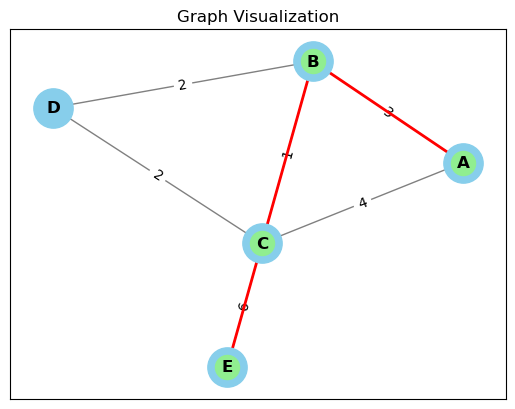

In [120]:
# Define the graph as an adjacency list
graph = {
    'A': [('B', 3), ('C', 4)],
    'B': [('A', 3), ('C', 1), ('D', 2)],
    'C': [('A', 4), ('B', 1), ('D', 2), ('E', 6)],
    'D': [('B', 2), ('C', 2)],
    'E': [('C', 6)]
}

# Print path
#path = []
path = ['A', 'B', 'C', 'E']
#path = ['A', 'D','E']


# Visualize the graph and the path
visualize_graph(graph, path)


## 1) Basic greedy rule seach

In [121]:
# Funtion for the Basic greedy rule search algorithm
def basic_greedy_rule_search(graph, start, goal, doprint=False):

    # Initializations
    path         = [start]
    visited      = {start}
    current_node = start
    total_cost   = 0

    if doprint:
        print()
        print('*************************************************************')
        print("Visiting node:", current_node)

    # Iterate while the current node is not the goal
    while current_node != goal:

        # Find the minimum weight edge from the current node that doesn't form a cycle
        min_weight = float('inf')
        next_node  = None

        # Expore neighbor
        for neighbor, weight in graph.get(current_node, []):
            # If not visited and its weight is lower than the current next node
            if neighbor not in visited and weight < min_weight:
                # Save this neighbor as the next node
                min_weight = weight
                next_node = neighbor


        # If no valid edge is found, break the loop
        if next_node is None:
            # No path found
            return None, float('inf')

        if doprint:
            print()
            print('*************************************************************')
            print("Visiting node:", next_node)

        # Add the next node to the path and update the current node and total cost
        path.append(next_node)
        visited.add(next_node)
        current_node = next_node
        total_cost += min_weight

    # Return the path and the total cost
    return path, total_cost

**Algorithm**    

    function basic_greedy_rule_seach(graph, source, goal):
      
      Initializations
        - Create

## 2) Dijkstra search

In [122]:
# Funtion for the Dijkstra search algorithm
def dijkstra(graph, start, goal, doprint=False):

    # Initializations

    # Create a table for distances from each node to the goal node
    distances = {node: float('inf') for node in graph} # set all distances to ∞
    distances[start] = 0 # Starting point distance is 0; distances[source] = 0

    # Priority queue PQ with the start node information
    # (current_distance=0, current_node=start)
    PQ = [(0, start)]

    # Set for visited nodes
    visited = set()

    # Dictionary to track the previous node of each node in the graph
    previous_nodes = {node: None for node in graph}

    if doprint:
      print('*************************************************************')
      print("Distances:       ", distances)
      print("Previous nodes:  ", previous_nodes)
      print("Priority Queue:  ", PQ)
      print("Visited nodes:   ", visited)



    # While there are elements in the priority queue PQ
    while PQ:

        # Dequeue the node with the lowest distance to the start node (i.e., go to visit the node with the lowest distance to the start node)
        current_distance, current_node = heapq.heappop(PQ)

        if doprint:
          print()
          print('*************************************************************')
          print("Visiting node:", current_node)

        # Stop if the goal has been reached
        if current_node == goal:
            if doprint:
              print("   The goal is reached, returning the path and total distance to the goal")
            break

        # Mark the current node as visited
        visited.add(current_node)
        if doprint:
          print(f"   Visited nodes:", visited)



        # For each adjacent_node of the current_node (explore adjacent nodes)
        for adjacent_node, weight in graph[current_node]:

            if doprint:
              print()
              print(f"   Exploring adjacent node {adjacent_node}")

             # Calculate the distance (from start) for this adjacent_node
            distance_to_adjacent_node = current_distance + weight

            # If the new distance is shorter that the existing for this node:
            if distance_to_adjacent_node < distances[adjacent_node]:
                # Update distance of this adjacent_node
                distances[adjacent_node] = distance_to_adjacent_node
                # Put current_node as the previous node for this adjacent node
                previous_nodes[adjacent_node] = current_node
                # Push/Enqueue in PQ the adjacent_node and its distance from the start
                heapq.heappush(PQ, (distance_to_adjacent_node, adjacent_node))

                if doprint:
                  print(f"      The distance (from start) is: {distance_to_adjacent_node}")
                  print(f"      Priority queue:              ", PQ)
                  print(f"      Distances:                   ", distances)
                  print(f"      Previous nodes:              ", previous_nodes)

            else:
                if doprint:
                  print(f"      Not required to update distance to this node")



    # Reconstruct the path using previous_nodes, that is, path = f(previous_nodes)
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = previous_nodes[current]
    path.reverse()

    if doprint:
      print()
      print('*************************************************************')
      print("Shortest Path:", path)
      print("Distance to goal:", distances[goal])

    # Return path and distance to the goal
    return path, distances[goal]


**Algorithm**    

    function Dijkstra(graph, source, goal):
      
      Initializations
        - Create a table for distances from each node to the goal node
          set distances[source] = 0, all others = ∞
        
        - Priority queue PQ with the start node information:
          (current_distance=0, current_node=start)
        
        - Dictionary to track the previous node of each node in the graph
          previous_nodes = {node1: None,  node2: None, ..., nodeN: None}
    

      While there are elements in the priority queue PQ:

        a. Dequeue the node with the lowest distance to the start node, i.e., go to visit the node with the lowest distance to the start node
           (current_distance, current_node)

        b. Stop if the goal has been reached, that is, break if current_node == goal
  
        c. Mark current_node as visited
  
        d. For each adjacent_node of current_node (explore adjacent nodes):

               Calculate the distance (from start) to this node: temp_dist = distances[current_node] + weight(current_node, neighbor)

               If the distance is shorter that the existing for this node: if temp_dist < distances[neighbor]:
                 - Update the distance to the node: distances[neighbor] = temp_dist
                 - Put current_node as the previous node for this adjacent node: previous_nodes[neighbor] = current_node
                 - Push/Enqueue in PQ the adjacent_node and its distance from the start
    
      Reconstruct the path using previous_nodes, that is, path = f(previous_nodes)

      Return path and distances[goal]

In [123]:
# Pilas mauricio: incorporar mejora
#        # If the adjacent_node has not been visited
#        if adjacent_node not in visited:
#        else:
#            if doprint:
#                print(f"      This node was visited before")


## 3) Greedy best first search

In [124]:
# Funtion for the Greedy Best First Search algorithm
def greedy_best_first_search(graph, start, goal, heuristics, doprint=False):

    # Initializations

    # Priority queue PQ with the start node information
    # (heuristic=heuristics[start], current_distance=0, current_node=start, path=[start])
    PQ = [(heuristics[start], 0, start, [start])]

    # Set for visited nodes
    visited = set()

    if doprint:
      print('*************************************************************')
      print("Heuristic:       ", heuristics)
      print("Priority Queue:  ", PQ)
      print("Visited nodes:   ", visited)



    # While there are elements in the priority queue PQ
    while PQ:

        # Dequeue the node with the lowest heuristic distance (i.e., go to visit the node with the lowest heuristic distance)
        heuristic, current_distance, current_node, path = heapq.heappop(PQ)

        if doprint:
          print()
          print('*************************************************************')
          print("Visiting node:", current_node)

        # If the goal is reached, return the path and the total distance to the goal
        if current_node == goal:
            if doprint:
              print("   The goal is reached, returning the path and total distance to the goal")
              print("   Shortest path:      ", path)
              print("   Distance to goal:   ", current_distance)

            return path, current_distance

        # Mark the current node as visited
        visited.add(current_node)
        if doprint:
          print(f"   Visited nodes:", visited)



        # For each adjacent_node of the current_node (explore adjacent nodes)
        for adjacent_node, weight in graph[current_node]:
            if doprint:
              print()
              print(f"   Exploring adjacent node {adjacent_node}")

            # If the adjacent_node has not been visited
            if adjacent_node not in visited:
                # Calculate the distance (from start) for this adjacent_node
                distance_to_adjacent_node = current_distance + weight
                # Save the path to this adjacent_node
                path_to_adjacent_node = path + [adjacent_node]
                # Push/Enqueue the adjacent_node in PQ with its updated information
                heapq.heappush(PQ, (heuristics[adjacent_node], distance_to_adjacent_node, adjacent_node, path_to_adjacent_node))

                if doprint:
                  print(f"      The distance (from start) is: {distance_to_adjacent_node}")
                  print(f"      The path (from start) is:     {path_to_adjacent_node}")
                  print(f"      The heuristic distance is:    {heuristics[adjacent_node]}")
                  print(f"      Priority queue:              ", PQ)
            else:
                if doprint:
                  print(f"      This node was visited before")



    if doprint:
        print()
        print('*************************************************************')
        print("No path was found")

    # Return no path and infinity distance to the goal (as no path was found)
    return None, float('inf')


**Algorithm (short)**    

    function greedy_best_first_search(graph, source, goal, heuristics):
      
      Initializations
        - Priority queue PQ with the start node and its heuristic distance

      While PQ is not empty:        
        - Dequeue the node with the lowest heuristic distance        
        - If this node is the goal, return the path
        - For each neighbor of the current node:
            If the neighbor has not been visited:
              - Record the path to the neighbor              
              - Enqueue the neighbor in PQ with its heuristic distance

**Algorithm (detailed)**    

    function greedy_best_first_search(graph, start, goal, heuristics):
      
      Initializations
        - Priority queue PQ with the start node information:
        (heuristic=heuristics[start], current_distance=0, current_node=start, path=[start])
        - Set for visited nodes:
          visited_nodes = []


      While there are elements in the priority queue PQ:

        a. Dequeue the node with the lowest heuristic distance, i.e., go to visit the node with the lowest heuristic distance:
           (heuristic, current_distance, current_node, path)

        b. If current_node is the goal:
           return path and current_distance

        c. Mark current_node as visited: add current_node to visited_nodes
  
        d. For each adjacent_node of current_node (explorea djacent nodes):

              if the adjacent_node has not been visited:

                - Update distance of this adjacent_node:  
                  distance_to_adjacent_node = current_distance + weight(current_node, adjacent_node)
                              
                - Save the path to this adjacent_node:
                  path_to_adjacent_node = (path , adjacent_node)

                - Push/Enqueue the adjacent_node in PQ with its updated information:
                  (heuristic=heuristics[adjacent_node],current_distance=path_to_adjacent_node,
                  current_node=adjacent_node, path=path_to_adjacent_node)

      Return no path and infinity distance to the goal (as no path was found)






## 4) A* search

In [125]:
# Funtion for the A* search algorithm
def a_star_search(graph, start, goal, heuristics, doprint=False):

    # Initializations

    # Priority queue with the start node information
    # (f_score=heuristics[start], current_distance=0, current_node=start, path=[start])
    PQ = [(heuristics[start], 0, start, [start])]

    # Set for visited nodes
    visited = set()

    if doprint:
      print('*************************************************************')
      print("Heuristic:       ", heuristics)
      print("Priority Queue:  ", PQ)
      print("Visited nodes:   ", visited)



    # While there are elements in the priority queue PQ
    while PQ:

        # Dequeue the node with the lowest f_score (i.e., go to visit the node with the lowest f_score)
        f_score, current_distance, current_node, path = heapq.heappop(PQ)

        if doprint:
          print()
          print('*************************************************************')
          print("Visiting node:", current_node)

        # If the goal is reached, return the path and the total distance to the goal (g_score)
        if current_node == goal:
            if doprint:
              print("   The goal is reached, returning the path and total distance to the goal")
              print("   Shortest path:      ", path)
              print("   Distance to goal:   ", current_distance)
            return path, current_distance

        # Mark the current node as visited
        visited.add(current_node)
        if doprint:
          print(f"   Visited nodes:", visited)



        # For each adjacent_node of the current_node (explore adjacent nodes)
        for adjacent_node, weight in graph[current_node]:
            if doprint:
              print()
              print(f"   Exploring adjacent node {adjacent_node}")

            if adjacent_node not in visited:

                # Calculate the distance (from start) for this adjacent_node (new_g_score==distance_to_adjacent_node)
                distance_to_adjacent_node = current_distance + weight

                # Calculate the f_score using g_score and heuristic
                f_score = distance_to_adjacent_node + heuristics[adjacent_node]
                # Save the path to this adjacent_node
                path_to_adjacent_node = path + [adjacent_node]
                # Push/Enqueue the adjacent_node in PQ with its updated information
                heapq.heappush(PQ, (f_score, distance_to_adjacent_node, adjacent_node, path_to_adjacent_node))
                if doprint:
                  print(f"      The distance (from start) is: {distance_to_adjacent_node}")
                  print(f"      The heuristic distance is:    {heuristics[adjacent_node]}")
                  print(f"      The f_score is:               {f_score}")
                  print(f"      The path (from start) is:     {path_to_adjacent_node}")
                  print(f"      Priority queue:              ", PQ)
            else:
                if doprint:
                  print(f"      This node was visited before")


    if doprint:
        print()
        print('*************************************************************')
        print("No path was found")

    # Return no path and infinity distance to the goal (as no path was found)
    return None, float('inf')  # If no path is found


**Algorithm (short)**    

    function a_star_search(graph, source, goal, heuristics):
      
      Initializations
        - Priority queue PQ with the start node information:
        (heuristic=heuristics[start], current_distance=0, current_node=start, path=[start])
        - Set for visited nodes:
          visited_nodes = []


      While there are elements in the priority queue PQ:

        a. Dequeue the node with the lowest heuristic distance, i.e., go to visit the node with the lowest heuristic distance:
           (heuristic, current_distance, current_node, path)

        b. If current_node is the goal:
           return path and current_distance

        c. Mark current_node as visited: add current_node to visited_nodes
  
        d. For each adjacent_node of current_node (explorea djacent nodes):


**TBD**

## Examples

### Define graph

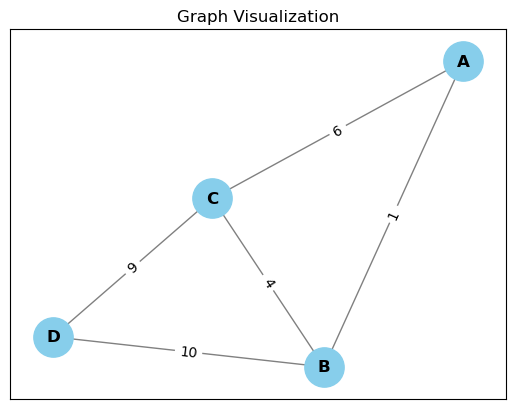

In [126]:
# ******************************************************************************
# Choose a graph
TipoGraph = 1



# ******************************************************************************
if TipoGraph == 1:
  # Define the graph with edges and weights
  graph = {
      'A': [('B', 1), ('C', 6)],
      'B': [('A', 1), ('C', 4), ('D',10)],
      'C': [('A', 6), ('B', 4), ('D', 9)],
      'D': [('B',10), ('C', 9)],
  }

  # Define the start and goal vertices
  start = 'A'
  goal  = 'D'

  # Heuristic distances to goal D
  heuristics = {
      'A': 10,    # the optimal distance is 11
      'B':  6,    # the optimal distance is 10
      'C':  8,    # the optimal distance is 9
      'D':  0,
  }

  # Heuristic distances to goal D (incorrect for BSF)
  heuristics = {
      'A': 10,    # the optimal distance is 11
      'B':  6,    # the optimal distance is 10
      'C':  5,    # the optimal distance is 9
      'D':  0,
  }



# ******************************************************************************
elif TipoGraph == 2:
  # Define the graph with edges and weights
  graph = {
      'A': [('B', 2), ('C', 4)],
      'B': [('A', 2), ('C', 1), ('D', 5)],
      'C': [('A', 4), ('B', 1), ('D', 2)],
      'D': [('B', 5), ('C', 2), ('E', 6)],
      'E': [('D', 6)]
  }

  # Define the start and goal vertices
  start = 'A'
  goal  = 'E'

  # Heuristic distances to goal E (incorrent for BSF)
  heuristics = {
      'A':10,    # the optimal distance is 11
      'B': 6,    # the optimal distance is 9
      'C': 7,    # the optimal distance is 8
      'D': 7,    # the optimal distance is 6
      'E': 0
  }

  # Heuristic distances to goal E (incorrent for BSF)
  heuristics = {
      'A': 10,    # the optimal distance is 11
      'B': 8,    # the optimal distance is 9
      'C': 9,    # the optimal distance is 8
      'D': 5,    # the optimal distance is 6
      'E': 0
  }



# ******************************************************************************
elif TipoGraph == 3:
  # Define the graph with edges and weights
  graph = {
      'A': [('B', 8), ('C', 4), ('E', 6)],
      'B': [('A', 8), ('D',10)],
      'C': [('D', 2), ('E',12), ('F', 6)],
      'D': [('B',10), ('C', 2), ('F',12)],
      'E': [('A', 6), ('C',12), ('F', 4)],
      'F': [('D',12), ('C', 6), ('E', 4)]
  }

  # Define the start and goal vertices
  start = 'E'
  goal  = 'D'

  # Heuristic distances to goal D
  heuristics = {
      'A': 5,   # the optimal distance is  6 (A,C,D)
      'B': 8,   # the optimal distance is 10 (B,D)
      'C': 1,   # the optimal distance is  2 (C,D)
      'D': 0,   # the optimal distance is  0 (D)
      'E':10,   # the optimal distance is 12 (E,A,C,D) o (E,F,C,D)
      'F':10    # the optimal distance is 12 (F,D)

  }



# ******************************************************************************
# Visualize the graph
visualize_graph(graph, [])


### Basic greedy rule search

['A', 'B', 'C', 'D']
14


/tmp/ipykernel_77037/4048290733.py:26: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)


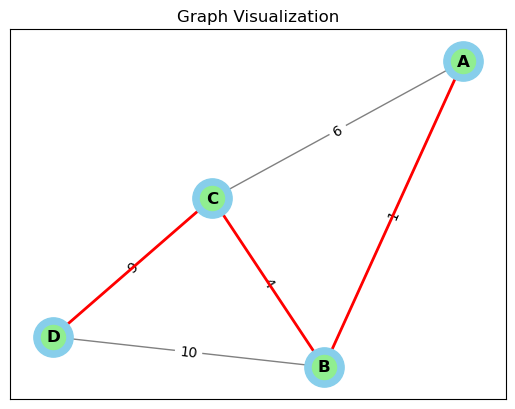

In [127]:
# Run the Dijkstra algorithm
path_BGRS, dist2goal_BGRS = basic_greedy_rule_search(graph, start, goal, False)

# Print shortest path from start to goal
print(path_BGRS)
print(dist2goal_BGRS)

# Visualize the graph and the path
visualize_graph(graph, path_BGRS)

### Dijkstra search

['A', 'B', 'D']
11


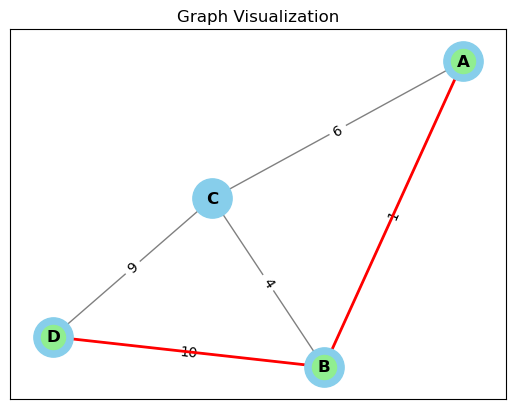

In [128]:
# Run the Dijkstra algorithm
path_Dijkstra, dist2goal_Dijkstra = dijkstra(graph, start, goal, False)

# Print shortest path from start to goal
print(path_Dijkstra)
print(dist2goal_Dijkstra)

# Visualize the graph and the path
visualize_graph(graph, path_Dijkstra)


### Greedy best first search

['A', 'C', 'D']
15


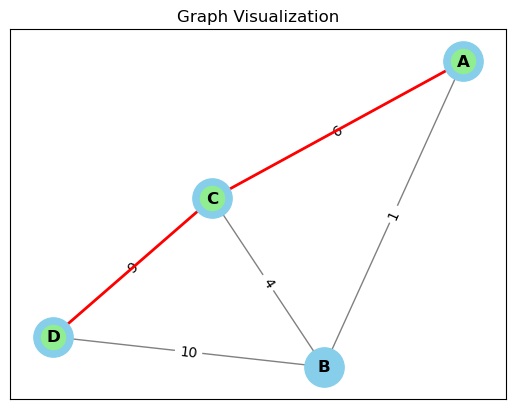

In [129]:
# Execute the search from A to E
path_GBFS, dist2goal_GBFS = greedy_best_first_search(graph, start, goal, heuristics, False)

# Print path from start to goal
print(path_GBFS)
print(dist2goal_GBFS)

# Visualize the graph and the path
visualize_graph(graph, path_GBFS)


### A* search

['A', 'B', 'D']
11


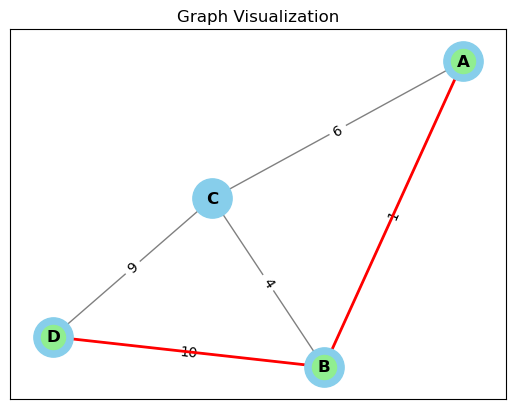

In [130]:
# Execute the search from A to E
path_Astar, dist2goal_Astar = a_star_search(graph, start, goal, heuristics, False)

# Print path from start to goal
print(path_Astar)
print(dist2goal_Astar)

# Visualize the graph and the path
visualize_graph(graph, path_Astar)


# PART 2: USING MAPS

## Define map


### Create a map

Let's create an array for the map with:

- `1`: an open path (can walk through)
- `0`: a wall (cannot pass through)

In [131]:
# Define array for the map
map = np.array([
    [1, 0, 1, 1, 1, 0],
    [1, 1, 1, 0, 1, 0],
    [1, 0, 1, 0, 1, 1],
    [1, 1, 1, 1, 1, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 0, 1, 1, 1, 1],
])

Undertanding the array `map`

In [132]:
# Number of rows
Nrows = map.shape[0]

# Number of columns (assuming all rows have the same number of elements)
Ncols = map.shape[0]

# Print information about "map" (Type of object, Nrows,Ncols )
print(f"Information about the variable `map´")
print(f"   Type of variable:  {type(map)}")
print(f"   Number of rows:    {Nrows}")
print(f"   Number of columns: {Ncols}")

Information about the variable `map´
   Type of variable:  <class 'numpy.ndarray'>
   Number of rows:    6
   Number of columns: 6


Define start and goal

In [133]:
# Define start and goal
start = (0, 0)  # Starting point
goal  = (5, 5)  # Goal point


Create a path

In [134]:
# Create a path
path = [
 (0, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4),
 (2, 4), (3, 4), (3, 3), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5)
 ]


### Print map

When moving through the map searching for the shorthes path:

- `1`: an open path (can walk through)

- `0`: a wall (cannot pass through)

- `S`: start

- `G`: goal

- `*`: visited positions that are part of the solution



In [135]:
# Function to print `map´ in a fancy way
def print_map(map, start=None, goal=None, path=None):

  # Convert to a string array so we can replace values with "*"
  map_str = map.astype(str)

  # Replace each specified position with "*"
  if path is not None:
    for pos in path:
      map_str[pos] = "*"

  # Compute the number of rows and columns in the map
  Nrows, Ncols = map.shape

  # Iterate through each row
  for row in range(Nrows):

    # Variable to hold the symbols for the current row
    row_representation = []

    # Iterate through each column
    for col in range(Ncols):

      if (row, col) == start:
        row_representation.append(' S ')

      elif (row, col) == goal:
        row_representation.append(' G ')

      else:
        # If the map_str has a 0, print 0
        if map_str[row][col] == '0':
          row_representation.append(' 0 ')
        # If the map_str has a 1, print 1
        elif map_str[row][col] == '1':
          row_representation.append(' 1 ')
        # If the map_str has a *, print *
        elif map_str[row][col] == '*':
          row_representation.append(' * ')

    # Join the row's symbols with spaces to form a string and print it
    print(" ".join(row_representation))


In [136]:
# Print map
print_map(map, start, goal, path=None)


 S   0   1   1   1   0 
 1   1   1   0   1   0 
 1   0   1   0   1   1 
 1   1   1   1   1   0 
 1   0   1   0   0   0 
 1   0   1   1   1   G 


In [137]:
# Print map
print_map(map, start, goal, path)


 S   0   *   *   *   0 
 *   *   *   0   *   0 
 1   0   1   0   *   1 
 1   1   *   *   *   0 
 1   0   *   0   0   0 
 1   0   *   *   *   G 


### Plot map

In [138]:
# Function to plot `map´ in a fancy way
def plot_map(map, start=None, goal=None, path=None):

  # Plot the map
  plt.figure(figsize=(6, 6))
  plt.imshow(map, cmap='gray')

  # Plot start and goal
  if start is not None and goal is not None:
    plt.scatter(start[1], start[0], color='green', s=150, label='Start')
    plt.scatter(goal[1], goal[0], color='red', s=150, label='Goal')

  # Plot the path
  if path is not None:
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, color='blue', linewidth=6, label='Path')

  # Set params
  plt.xlabel('X')
  plt.ylabel('Y')

  plt.xticks(range(0,map.shape[0]))
  plt.yticks(range(0,map.shape[1]))

  plt.grid(color='k', linestyle=':', linewidth=1)
  plt.show()

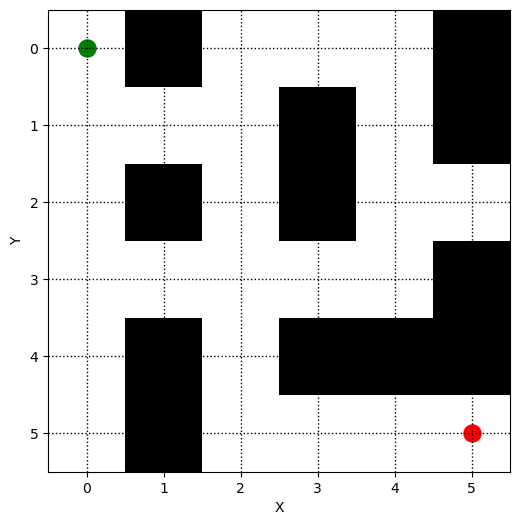

In [139]:
# Plot map
plot_map(map, start, goal, path=None)


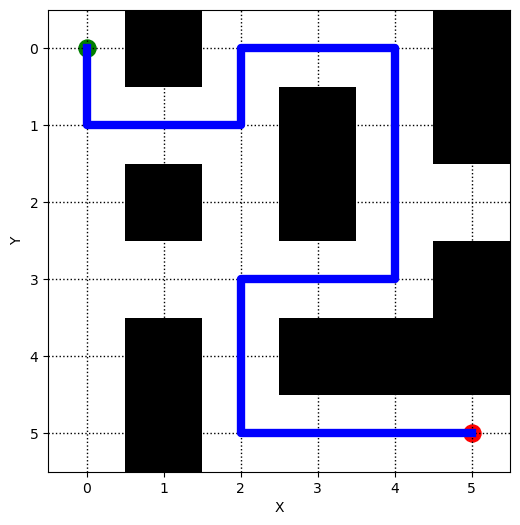

In [140]:
# Plot map
plot_map(map, start, goal, path)


## 1) Basic greedy rule serach

In [141]:
# Function for the algorithm
# IRS STUDENT
# AQUI TU TAREA

In [142]:
def basic_greedy_rule_search_for_map(map_arr, start, goal, doprint=False):
    # Utils locales
    def in_bounds(r, c): return 0 <= r < map_arr.shape[0] and 0 <= c < map_arr.shape[1]
    def is_open(r, c):  return map_arr[r, c] == 1
    def neighbors4(r, c):
        for dr, dc in [(1,0), (0,1), (-1,0), (0,-1)]:
            nr, nc = r+dr, c+dc
            if in_bounds(nr, nc) and is_open(nr, nc):
                yield (nr, nc)
    def manhattan(a, b): return abs(a[0]-b[0]) + abs(a[1]-b[1])

    current = start
    visited = {start}
    path = [start]
    total_cost = 0

    while current != goal:
        cand = [n for n in neighbors4(*current) if n not in visited]
        if not cand:
            return None, float('inf')  # sin salida
        next_node = min(cand, key=lambda p: manhattan(p, goal))
        path.append(next_node)
        visited.add(next_node)
        total_cost += 1
        current = next_node
        if doprint:
            print(f"Move to {current}, g={total_cost}, h={manhattan(current, goal)}")

    return path, total_cost


## 2) Dijkstra search

In [143]:
# Function for the algorithm
# IRS STUDENT
# AQUI TU TAREA

In [144]:
def dijkstra_for_map(map_arr, start, goal, doprint=False):
    # Utils locales
    def in_bounds(r, c): return 0 <= r < map_arr.shape[0] and 0 <= c < map_arr.shape[1]
    def is_open(r, c):  return map_arr[r, c] == 1
    def neighbors4(r, c):
        for dr, dc in [(1,0), (0,1), (-1,0), (0,-1)]:
            nr, nc = r+dr, c+dc
            if in_bounds(nr, nc) and is_open(nr, nc):
                yield (nr, nc)
    def reconstruct(came_from, s, g):
        if g not in came_from and s != g: return None
        path, cur = [g], g
        while cur != s:
            cur = came_from[cur]
            path.append(cur)
        path.reverse()
        return path

    import heapq
    dist = {start: 0}
    came_from = {start: None}
    pq = [(0, start)]
    visited = set()

    while pq:
        g, node = heapq.heappop(pq)
        if node in visited: 
            continue
        visited.add(node)
        if node == goal:
            break
        for nb in neighbors4(*node):
            ng = g + 1
            if ng < dist.get(nb, float('inf')):
                dist[nb] = ng
                came_from[nb] = node
                heapq.heappush(pq, (ng, nb))
                if doprint:
                    print(f"Update {nb}: g={ng} via {node}")

    path = reconstruct(came_from, start, goal)
    return path, dist.get(goal, float('inf'))


## 3) Greedy best first search

In [145]:
# Function for the algorithm
# IRS STUDENT
# AQUI TU TAREA

In [146]:
def greedy_best_first_search_for_map(map_arr, start, goal, doprint=False):
    # Utils locales
    def in_bounds(r, c): return 0 <= r < map_arr.shape[0] and 0 <= c < map_arr.shape[1]
    def is_open(r, c):  return map_arr[r, c] == 1
    def neighbors4(r, c):
        for dr, dc in [(1,0), (0,1), (-1,0), (0,-1)]:
            nr, nc = r+dr, c+dc
            if in_bounds(nr, nc) and is_open(nr, nc):
                yield (nr, nc)
    def manhattan(a, b): return abs(a[0]-b[0]) + abs(a[1]-b[1])
    def reconstruct(came_from, s, g):
        if g not in came_from and s != g: return None
        path, cur = [g], g
        while cur != s:
            cur = came_from[cur]
            path.append(cur)
        path.reverse()
        return path

    import heapq
    pq = [(manhattan(start, goal), start)]
    came_from = {start: None}
    visited = set()

    while pq:
        h, node = heapq.heappop(pq)
        if node in visited:
            continue
        visited.add(node)
        if node == goal:
            break
        for nb in neighbors4(*node):
            if nb not in visited and nb not in came_from:
                came_from[nb] = node
                heapq.heappush(pq, (manhattan(nb, goal), nb))
                if doprint:
                    print(f"Push {nb}: h={manhattan(nb, goal)} via {node}")

    path = reconstruct(came_from, start, goal)
    return path, (len(path) - 1 if path else float('inf'))


## 4) A* search

In [147]:
# Function for the algorithm
# IRS STUDENT
# AQUI TU TAREA

In [148]:
def a_star_for_map(map_arr, start, goal, doprint=False):
    # Utils locales
    def in_bounds(r, c): return 0 <= r < map_arr.shape[0] and 0 <= c < map_arr.shape[1]
    def is_open(r, c):  return map_arr[r, c] == 1
    def neighbors4(r, c):
        for dr, dc in [(1,0), (0,1), (-1,0), (0,-1)]:
            nr, nc = r+dr, c+dc
            if in_bounds(nr, nc) and is_open(nr, nc):
                yield (nr, nc)
    def manhattan(a, b): return abs(a[0]-b[0]) + abs(a[1]-b[1])
    def reconstruct(came_from, s, g):
        if g not in came_from and s != g: return None
        path, cur = [g], g
        while cur != s:
            cur = came_from[cur]
            path.append(cur)
        path.reverse()
        return path

    import heapq
    g_score = {start: 0}
    f_start = manhattan(start, goal)
    f_score = {start: f_start}
    came_from = {start: None}
    pq = [(f_start, start)]
    visited = set()

    while pq:
        f, node = heapq.heappop(pq)
        if node in visited:
            continue
        visited.add(node)
        if node == goal:
            break
        for nb in neighbors4(*node):
            ng = g_score[node] + 1
            if ng < g_score.get(nb, float('inf')):
                g_score[nb] = ng
                came_from[nb] = node
                fn = ng + manhattan(nb, goal)
                f_score[nb] = fn
                heapq.heappush(pq, (fn, nb))
                if doprint:
                    print(f"Update {nb}: g={ng}, h={fn-ng}, f={fn} via {node}")

    path = reconstruct(came_from, start, goal)
    return path, g_score.get(goal, float('inf'))


## Examples

### Define map

 S   1   1   0   1   1   1   1   0   1 
 0   0   1   0   1   0   0   1   0   1 
 1   1   1   1   1   1   0   1   1   1 
 1   0   0   0   0   1   1   1   0   0 
 1   1   1   1   0   0   1   1   1   1 
 0   0   1   1   1   1   1   0   0   1 
 1   1   1   0   0   0   1   1   1   1 
 1   0   1   1   1   1   1   0   0   1 
 1   1   1   0   1   0   1   1   1   1 
 0   1   1   1   1   1   0   0   1   G 


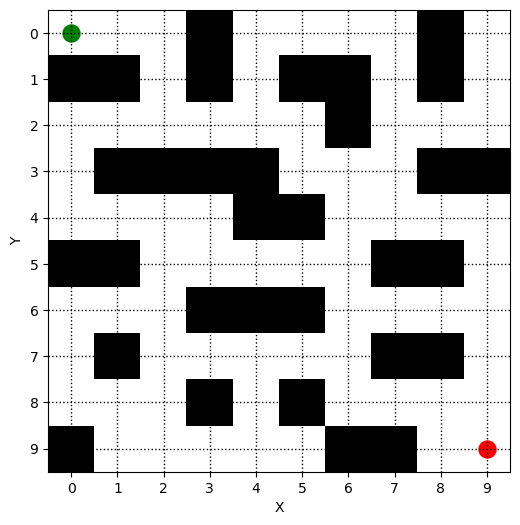

In [149]:
# ******************************************************************************
# Select one of the maps
TipoMap = 2 # (1,2,3,...)



# ******************************************************************************
# Define map and start and goal
if TipoMap==1:
  map = np.array([
      [1, 0, 1, 1, 1, 0],
      [1, 1, 1, 0, 1, 0],
      [1, 0, 1, 0, 1, 1],
      [1, 1, 1, 1, 1, 0],
      [1, 0, 1, 0, 0, 0],
      [1, 0, 1, 1, 1, 1],
  ])

  start = (0, 0)  # Starting point
  goal  = (5, 5)  # Goal point



# ******************************************************************************
elif TipoMap==2:
  map = np.array([
      [1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
      [0, 0, 1, 0, 1, 0, 0, 1, 0, 1],
      [1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
      [1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      [1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
      [0, 0, 1, 1, 1, 1, 1, 0, 0, 1],
      [1, 1, 1, 0, 0, 0, 1, 1, 1, 1],
      [1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
      [1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
      [0, 1, 1, 1, 1, 1, 0, 0, 1, 1],
  ])

  start = (0, 0)  # Starting point
  goal  = (9, 9)  # Goal point}



# ******************************************************************************
elif TipoMap==3:
  map = np.array([
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      [0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0],
      [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
      [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
      [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0],
      [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0],
      [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
      [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0],
      [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0],
      [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
      [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
      [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  ])

  start = (1, 1)  # Starting point
  goal  = (11, 11) # Goal point}



# ******************************************************************************
# Print map
print_map(map, start, goal, path=None)

# Plot map
plot_map(map, start, goal, path=None)


### Basic greedy rule seach

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (8, 7), (8, 8), (9, 8), (9, 9)]
18
 S   *   *   0   1   1   1   1   0   1 
 0   0   *   0   1   0   0   1   0   1 
 1   1   *   *   *   *   0   1   1   1 
 1   0   0   0   0   *   *   1   0   0 
 1   1   1   1   0   0   *   1   1   1 
 0   0   1   1   1   1   *   0   0   1 
 1   1   1   0   0   0   *   1   1   1 
 1   0   1   1   1   1   *   0   0   1 
 1   1   1   0   1   0   *   *   *   1 
 0   1   1   1   1   1   0   0   *   G 


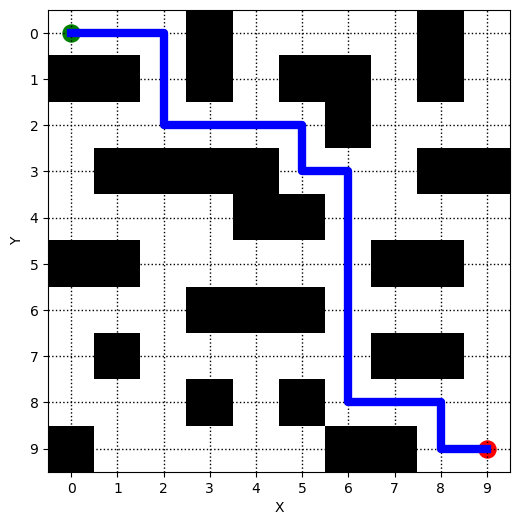

In [150]:

# Find the shortest path
path_BGRS, dist2goal_BGRS = basic_greedy_rule_search_for_map(map, start, goal, doprint=False)

# Print shortest path from start to goal
print(path_BGRS)
print(dist2goal_BGRS)

# Print map
print_map(map, start, goal, path_BGRS)

# Plot map
plot_map(map, start, goal, path_BGRS)


### Dijkstra search

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
18
 S   *   *   0   1   1   1   1   0   1 
 0   0   *   0   1   0   0   1   0   1 
 1   1   *   *   *   *   0   1   1   1 
 1   0   0   0   0   *   *   *   0   0 
 1   1   1   1   0   0   1   *   *   * 
 0   0   1   1   1   1   1   0   0   * 
 1   1   1   0   0   0   1   1   1   * 
 1   0   1   1   1   1   1   0   0   * 
 1   1   1   0   1   0   1   1   1   * 
 0   1   1   1   1   1   0   0   1   G 


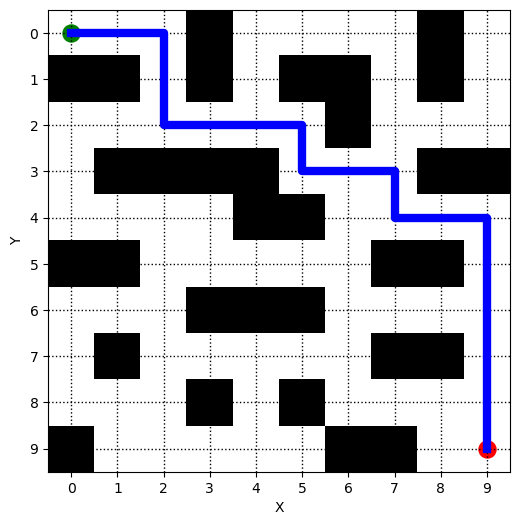

In [151]:

# Find the shortest path
path_Dijkstra, dist2goal_Dijkstra = dijkstra_for_map(map, start, goal, doprint=False)

# Print shortest path from start to goal
print(path_Dijkstra)
print(dist2goal_Dijkstra)

# Print map
print_map(map, start, goal, path_Dijkstra)

# Plot map
plot_map(map, start, goal, path_Dijkstra)

### Greedy best first search

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
18
 S   *   *   0   1   1   1   1   0   1 
 0   0   *   0   1   0   0   1   0   1 
 1   1   *   *   *   *   0   1   1   1 
 1   0   0   0   0   *   *   *   0   0 
 1   1   1   1   0   0   1   *   *   * 
 0   0   1   1   1   1   1   0   0   * 
 1   1   1   0   0   0   1   1   1   * 
 1   0   1   1   1   1   1   0   0   * 
 1   1   1   0   1   0   1   1   1   * 
 0   1   1   1   1   1   0   0   1   G 


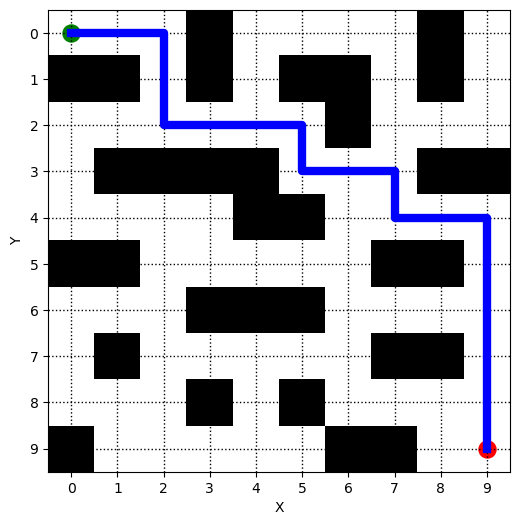

In [152]:

# Find the shortest path
path_GBFS, dist2goal_GBFS = greedy_best_first_search_for_map(map, start, goal, doprint=False)

# Print shortest path from start to goal
print(path_GBFS)
print(dist2goal_GBFS)

# Print map
print_map(map, start, goal, path_GBFS)

# Plot map
plot_map(map, start, goal, path_GBFS)


### A* search

[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (3, 7), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (9, 9)]
18
 S   *   *   0   1   1   1   1   0   1 
 0   0   *   0   1   0   0   1   0   1 
 1   1   *   *   *   *   0   1   1   1 
 1   0   0   0   0   *   *   *   0   0 
 1   1   1   1   0   0   1   *   *   * 
 0   0   1   1   1   1   1   0   0   * 
 1   1   1   0   0   0   1   1   1   * 
 1   0   1   1   1   1   1   0   0   * 
 1   1   1   0   1   0   1   1   1   * 
 0   1   1   1   1   1   0   0   1   G 


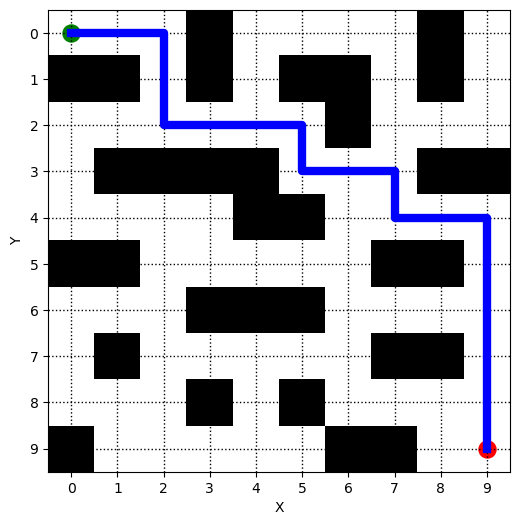

In [153]:

# Execute the search from A to E
path_Astar, dist2goal_Astar = a_star_for_map(map, start, goal, False)

# Print path from start to goal
print(path_Astar)
print(dist2goal_Astar)

# Print map
print_map(map, start, goal, path_Astar)

# Plot map
plot_map(map, start, goal, path_Astar)